In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
from tools.dataset import SPCDataset

ROOT = '/data6/lekevin/cayman'
img_dir = ROOT + '/rawdata'
ALL = ['train', 'val', 'test']
csv_filename = os.path.join(ROOT, 'data', '4', 'data_{}.csv')
dataset = {phase: SPCDataset(csv_filename=csv_filename.format(phase), img_dir=img_dir, phase=phase) for phase in ALL}
df = dataset['train'].data
test_imgs, lbls = dataset['val'].get_fns()
for phase in dataset:
    print(dataset[phase])
print(df['label'].value_counts())

Dataset [test] 1 classes, 196169 images
Dataset [train] 2 classes, 2134 images
Dataset [val] 2 classes, 377 images
0    1115
1    1019
Name: label, dtype: int64


# Visualize Classes

## Dataset Version 1
label, class

1 fish egg,
2 sinophonophore,
3 jelly_other,
4 rhizarian,
5 bubble,
6 OtherClass


Dataset Statistics
class, # of images
0    1115
1    1019
Name: label, dtype: int64
total images: 2134


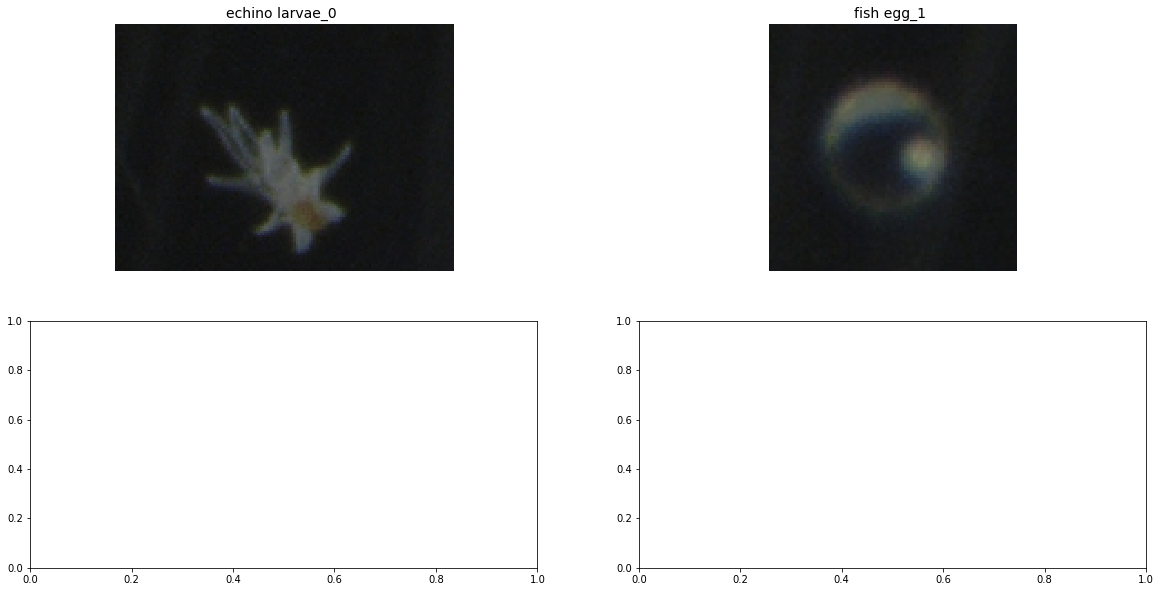

In [5]:
print('Dataset Statistics\nclass, # of images')
print(df['label'].value_counts(sort='ascending'))
print('total images: {}'.format(df.shape[0]))
df_groups = df.groupby('label')
numClasses = len(df_groups.groups.keys())
numCols = len(df['label'].unique())
fig, axarr = plt.subplots(max(numClasses/numCols+1,2), numCols, figsize=(20,10))
for i in range(numClasses):
    randomIdx = np.random.choice(df_groups.get_group(i).index)
    imgname = os.path.join(ROOT, 'rawdata/{}_SPC_Images_3-COLOR'.format(df['day'].iloc[randomIdx]), df['image'].iloc[randomIdx])
    img = plt.imread(imgname)
    axarr[i/numCols,i%numCols].imshow(img)
    axarr[i/numCols,i%numCols].set_axis_off()
    axarr[i/numCols,i%numCols].set_title('{}_{} '.format(df['class'].iloc[randomIdx],df['label'].iloc[randomIdx]), fontsize=14)
plt.show()

Displaying 100/1019 random images of class 1


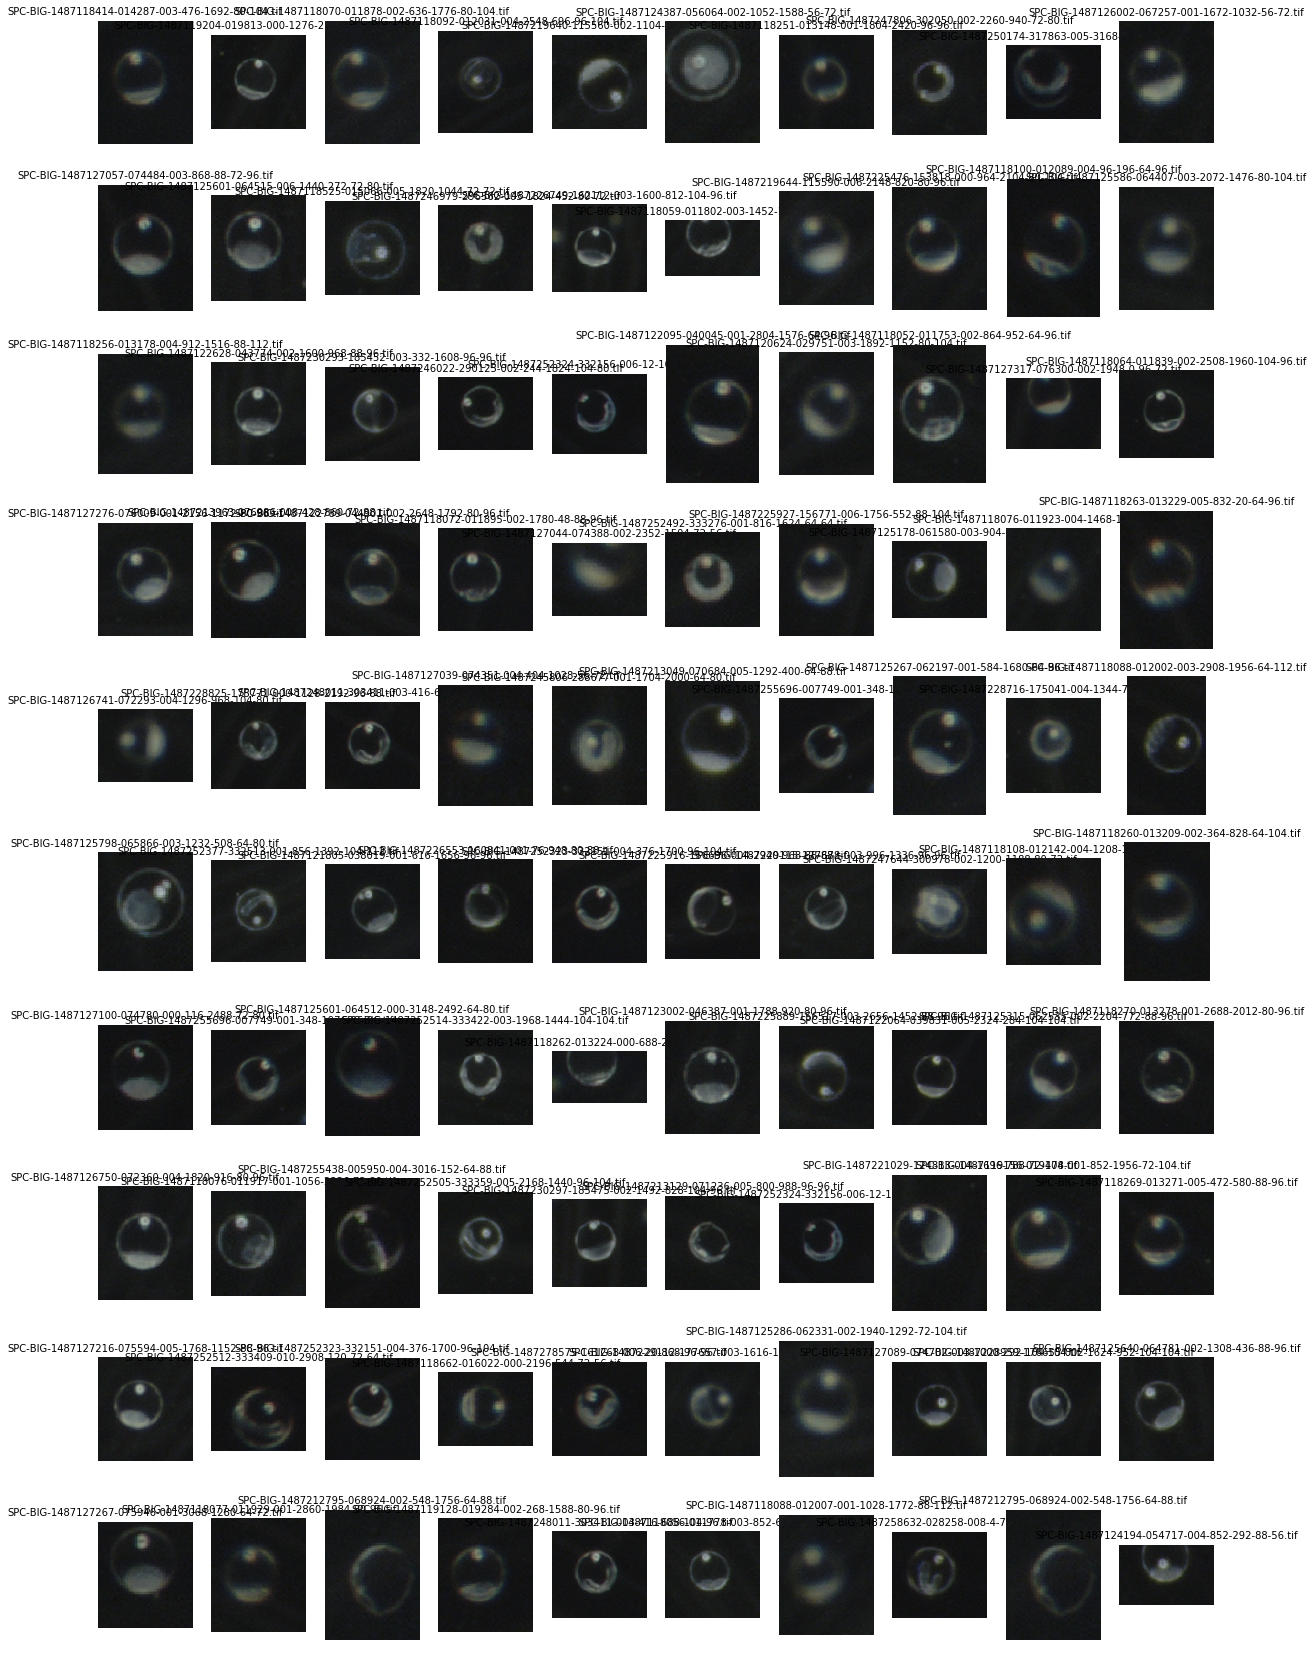

In [28]:
# ROOT = '/data6/lekevin/cayman'
# pred_df = pd.DataFrame ()
# for i in range (2):
#     filename = os.path.join (ROOT, 'rawdata/d3_predictions{}.txt'.format (i))
#     temp = pd.read_csv (filename, sep=',', names=['image', 'day', 'label'], header=None)
#     pred_df = pred_df.append (temp, ignore_index=True)
# pred_df['day'] = pred_df['day'].map ({'Thu Feb 16': 'EC3', 'Wed Feb 15': 'EC2', 'Fri Feb 17': 'EC3'})
# df = pred_df
df_groups = df.groupby('label')
selected_class = 1
numRows, numCols = 10,10
fig, axarr = plt.subplots(numRows, numCols, figsize=(20,30))
print('Displaying {}/{} random images of class {}'.format(numRows*numCols, len(df_groups.get_group(selected_class)), selected_class))
for i in range(numRows):
    for j in range(numCols):
        randomIdx = np.random.choice(df_groups.get_group(selected_class).index)
        imgname = os.path.join(ROOT, 'rawdata/{}_SPC_Images_3-COLOR'.format(df['day'].iloc[randomIdx]), df['image'].iloc[randomIdx])
        img = plt.imread(imgname)
        axarr[i,j].imshow(img)
        axarr[i,j].set_axis_off()
        axarr[i,j].set_title('{}'.format(df['image'].iloc[randomIdx]), fontsize=10)
plt.show()

In [18]:
test_imgs, lbls = dataset['train'].load_lmdb()
df = pd.DataFrame({'image': test_imgs, 'label':lbls})
df_groups = df.groupby(df['label'])
selected_class = 5
df['image']

Loading /data6/lekevin/cayman/data/1/train.LMDB
LMDB successfully loaded


0       [[[0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 4, 5, 6, 5, 5...
1       [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
2       [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
3       [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
4       [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
5       [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
6       [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
7       [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
8       [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
9       [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
10      [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
11      [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
12      [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
13      [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
14      [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
15      [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
16      [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
17      [[[0, 

Displaying 25/1753 random images of class 5


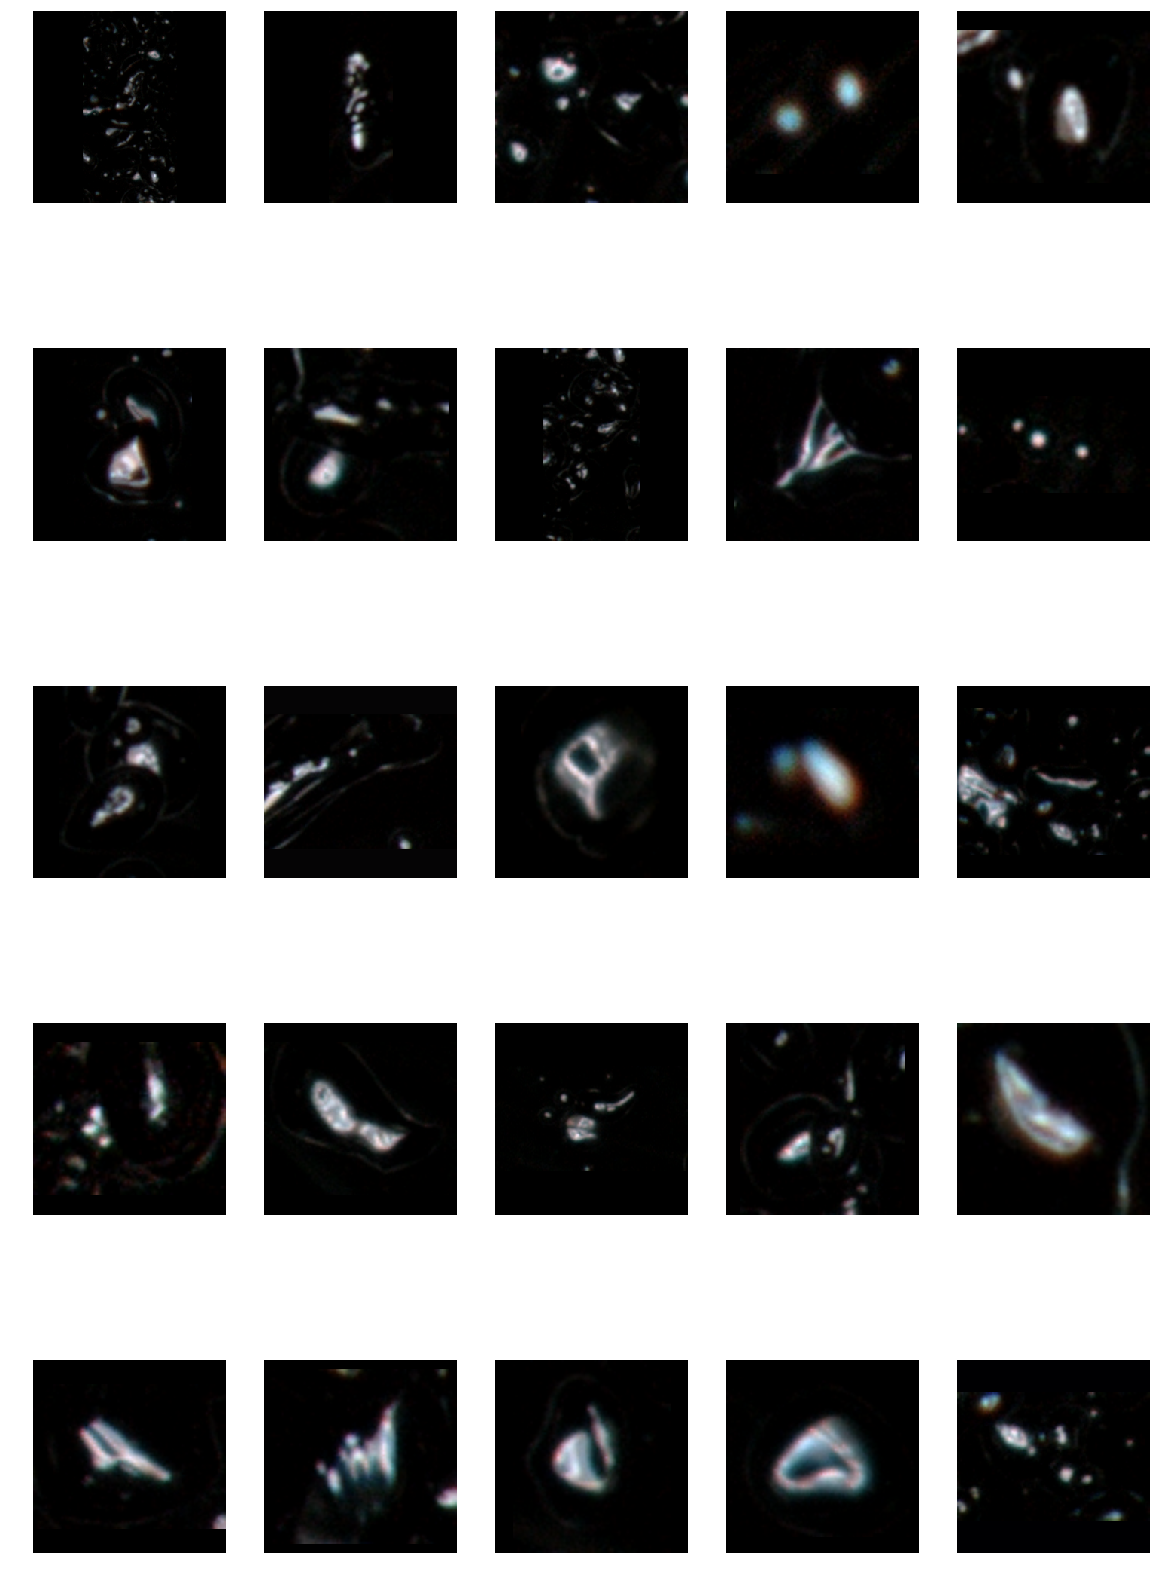

In [19]:
numRows, numCols = 5,5
fig, axarr = plt.subplots(numRows, numCols, figsize=(20,30))
print('Displaying {}/{} random images of class {}'.format(numRows*numCols, len(df_groups.get_group(selected_class)), selected_class))
for i in range(numRows):
    for j in range(numCols):
        randomIdx = np.random.choice(df_groups.get_group(selected_class).index)
#         imgname = df['image'].iloc[randomIdx]
#         img = plt.imread(imgname)
        img = df['image'].iloc[randomIdx]
        img = np.transpose(img, (2,1,0))
        axarr[i,j].imshow(img)
        axarr[i,j].set_axis_off()
#         axarr[i,j].set_title('{}'.format(os.path.basename(df['image'].iloc[randomIdx])), fontsize=10)
plt.show()

## Observe False Negatives/False Positives
1) Generate Confusion matrix

2) Set option for observing false positives of a given class

             precision    recall  f1-score   support

          0       1.00      0.99      0.99    196169
          1       0.00      0.00      0.00         0

avg / total       1.00      0.99      0.99    196169

Confusion matrix, without normalization
[[193979   2190]
 [     0      0]]


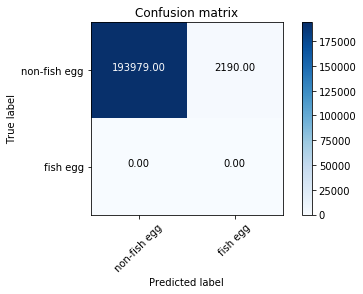

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
from tools.utils import plot_confusion_matrix

csv_filename = '/data6/lekevin/cayman/records/model_d4/version_1/test_predictions.csv'
df = pd.read_csv(csv_filename)
print(classification_report(df.gtruth, df.predictions))
cm = confusion_matrix(df.gtruth, df.predictions)
# with open ('/data6/lekevin/cayman/data/1/labels.txt') as f:
#     labels = {int (k): v for line in f for (k, v) in (line.strip ().split (None, 1),)}
labels = ['non-fish egg', 'fish egg']
plot_confusion_matrix(cm, classes=labels, normalize=False)

Total count: 6 images, displaying 6 random images


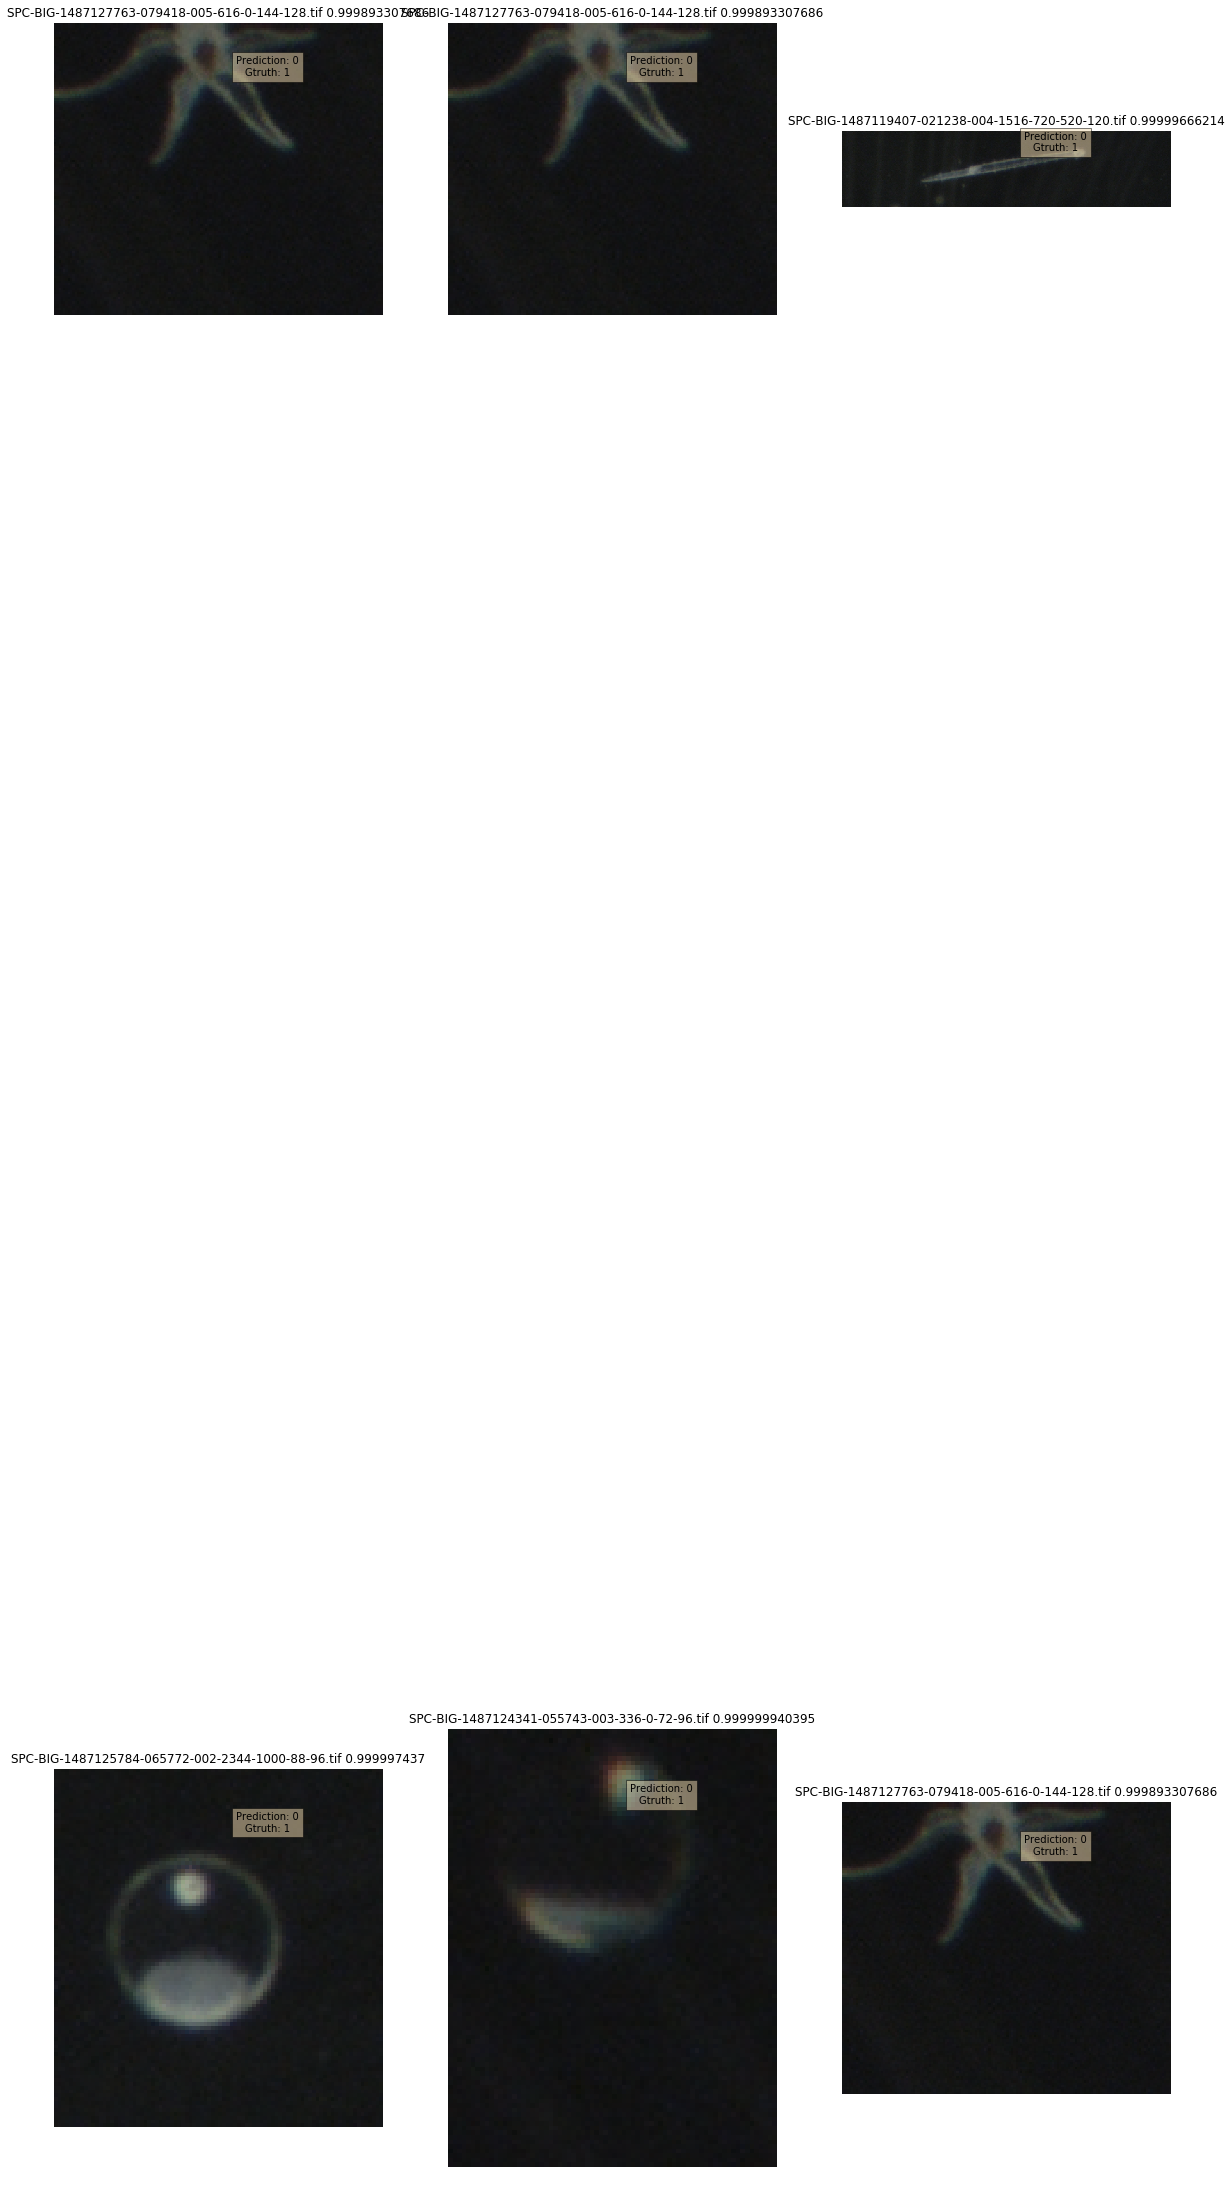

In [40]:
true_positive = df[(df['gtruth'] == 0) & (df['predictions'] == 0)]
true_negative = df[(df['gtruth'] == 1) & (df['predictions'] == 1)]
false_positive = df[(df['gtruth'] == 0) & (df['predictions'] == 1)]
false_negative = df[(df['gtruth'] == 1) & (df['predictions'] == 0)]
numRows = 20
numCols = 5
confusionDF = false_negative
gtruth, pred = 1, 0
if len(confusionDF) < numRows*numCols:
    numRows = 2
    numCols = 3
print 'Total count: {} images, displaying {} random images'.format(len(confusionDF), numRows*numCols)
fig, axarr = plt.subplots(numRows, numCols, figsize=(20, 60))
for i in range(numRows):
    for j in range(numCols):
        randomSmpl = confusionDF.sample(n=1)
        img = plt.imread(randomSmpl['image'].values[0])
        axarr[i,j].imshow(img)
        axarr[i,j].set_axis_off()
        axarr[i,j].set_title('{} {}'.format(os.path.basename(randomSmpl['image'].values[0]), randomSmpl['confidence_level'].values[0]))
        axarr[i,j].text(0.65, 0.85, 'Prediction: {}\nGtruth: {}'.format(pred, gtruth), bbox=dict(facecolor='wheat', alpha=0.5),
        horizontalalignment='center', verticalalignment='center', transform=axarr[i,j].transAxes)
plt.show()

Displaying 100/173 random images of class 1


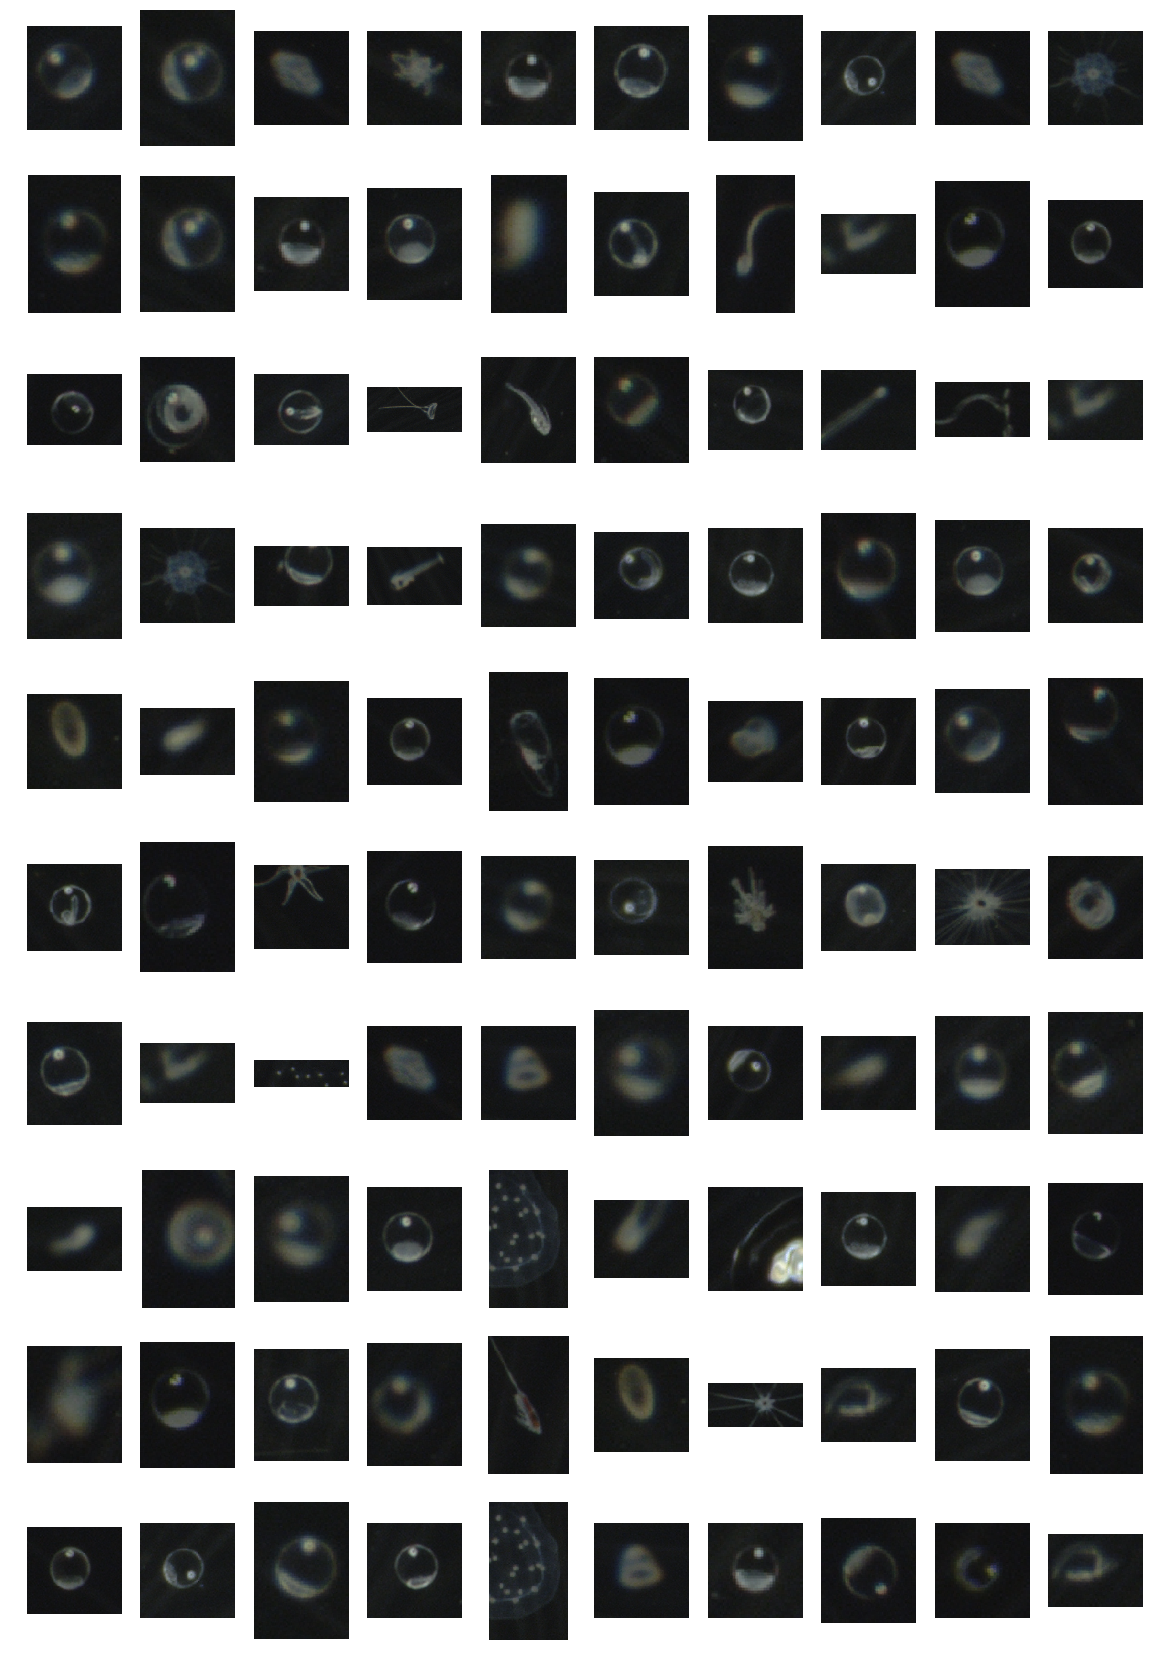

In [31]:
df_groups = df.groupby(df['gtruth'])
fish_egg_df = df_groups.get_group(1)
numRows, numCols = 10,10
print('Displaying {}/{} random images of class 1'.format(numRows*numCols, fish_egg_df.shape[0]))
figs, axarr = plt.subplots(numRows, numCols, figsize=(20,30))
for i in range(numRows):
    for j in range(numCols):
        randomIdx = np.random.choice(fish_egg_df.index)
        img = plt.imread(fish_egg_df['image'].loc[randomIdx])
        axarr[i,j].imshow(img)
        axarr[i,j].set_axis_off()
plt.show()

In [35]:
filename1 = '/data6/lekevin/cayman/rawdata/EC1_SPC_Images_3-COLOR/SPC-BIG-1487120301-027488-002-848-1860-120-176.tif'
filename = '/data6/lekevin/cayman/rawdata/EC2_SPC_Images_3-COLOR/SPC-BIG-1487257611-021130-006-1744-32-64-72.tif'
#img = caffe.io.load_image(filename)
#img = scipy.misc.imread(filename)
# img = cv2.imread(filename)
os.path.exists(filename)

False

In [26]:
fns = lbls = dataset['val'].get_fns()
nonExist=[i for i in fns if not os.path.exists(i)]

['/data6/lekevin/cayman/rawdata/EC1_SPC_Images_3-COLOR/SPC-BIG-1487151814-092328-000-1148-2208-112-104.tif']